In [1]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pylab as plt

In [3]:
# Plot parameters
params = {"mathtext.default": "regular",
          "text.usetex": False,
          "figure.dpi": 300}          
plt.rcParams.update(params)

In [4]:
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy")
from cascade.cascade_driver import CascadeDriver, InteractionModel

In [5]:
import chromo
target = chromo.kinematics.CompositeTarget([("N", 0.78), ("O", 0.22)])
ekin = chromo.kinematics.FixedTarget(1e10, "p", target)
model = chromo.models.DpmjetIII191
    
int_model0 = InteractionModel(model, ekin, target)

In [6]:
from mceq_utils.mceq_comparison import HybridMCEq
hybrid_mceq = HybridMCEq(pdg_id = 2212,
                           energy = 1e9,
                           theta_deg = 30,
                           slant_depths=[1, 10, 100, 600, 900, 1000, 1195],
                           energy_range=[1e-1, 2e9])

hybrid_mceq.set_result_categories([
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-"),
                     ("pi0", "pi0"),
                     ("el", "e+", "e-"),
                     ("e+", "e+"),
                     ("e-", "e-")
                     ])

In [7]:
regular_flux = hybrid_mceq.regular_solution()

In [62]:
cas_driver = hybrid_mceq.start_cascade_driver(int_model0, 1e5)

stop depth = 1195.9290875457918


In [68]:
hybrid_flux = hybrid_mceq.hybrid_solution(10)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:31<00:00,  3.12s/it]


Text(0, 0.5, 'Counts/bin/primary')

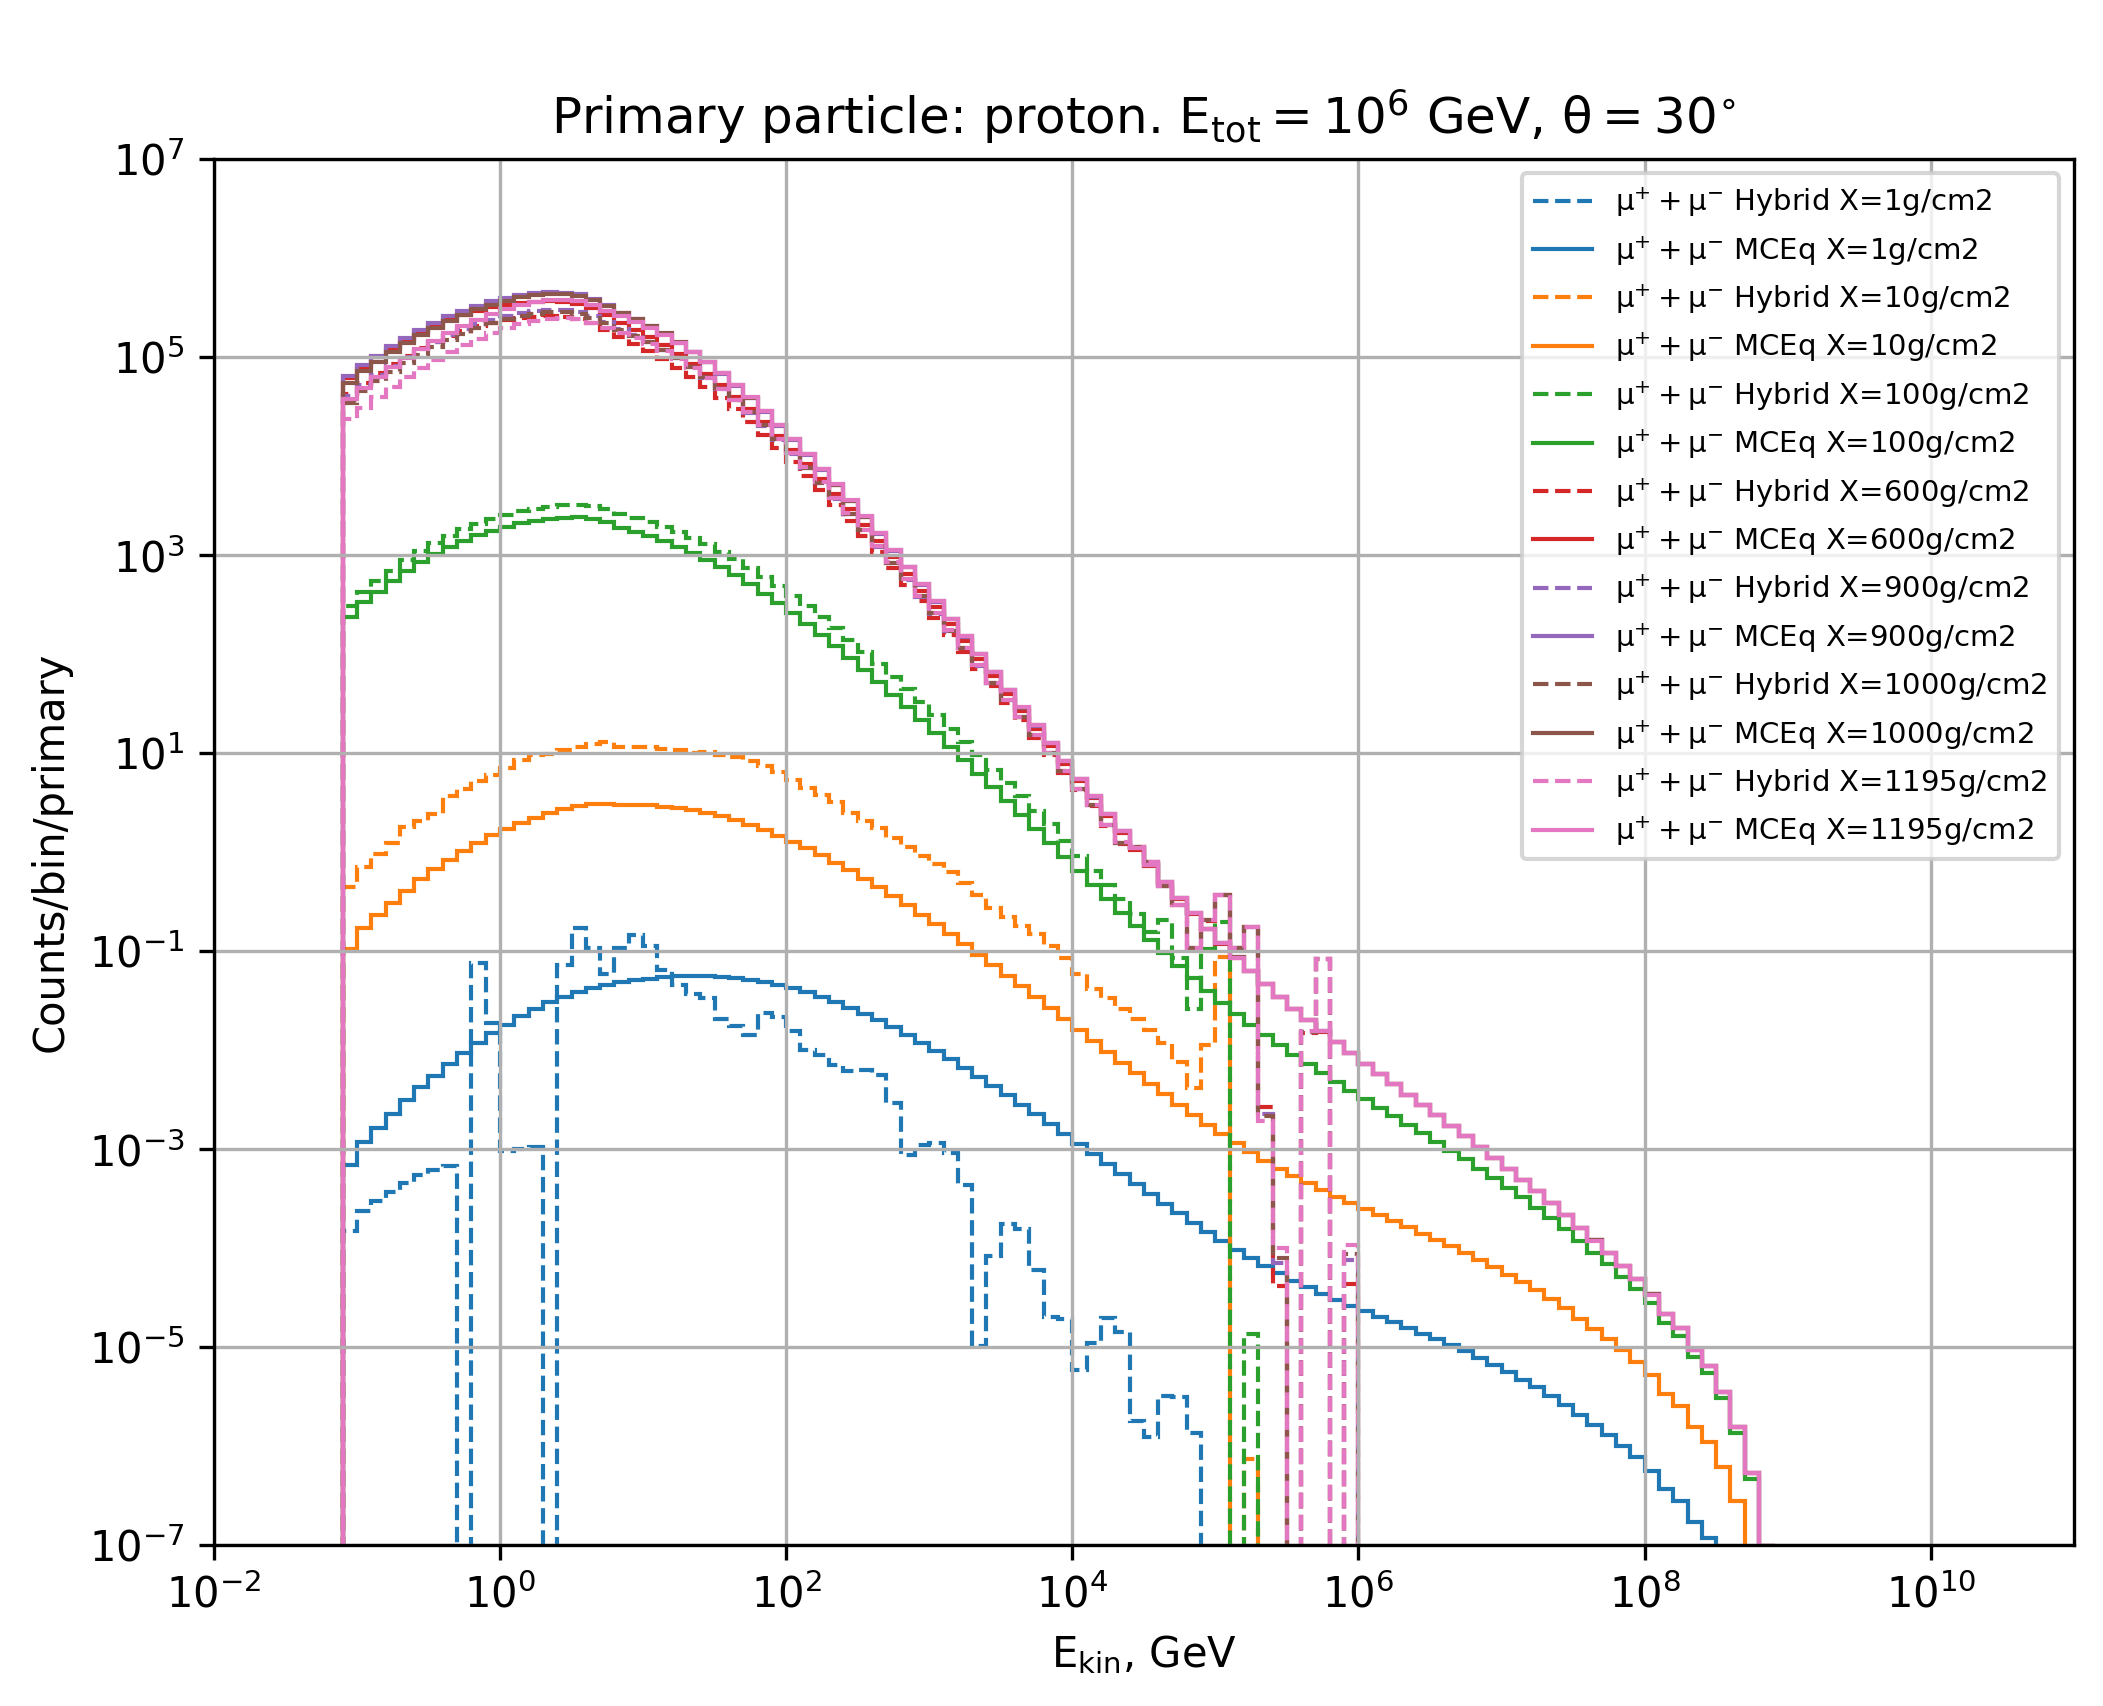

In [69]:
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure(figsize=(8, 6))
# plt.rcParams['figure.figsize'] = [4, 3]
ixdepth = 0
# plt.stairs(mceq_dist.flux[ixdepth]["pi0"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ Hybrid" + f"{mceq_dist.slant_depths[ixdepth]}", 
#            linestyle='-',
#            color = line_colors[0])
ixdepths = range(len(hybrid_mceq.slant_depths))
# ixdepths = [4, 5, 6]
for ixdepth in ixdepths:
    plt.stairs(hybrid_flux[ixdepth]["mu"], hybrid_mceq.e_bins, 
            label = r"${\mu}^{+} + {\mu}^{-}$ Hybrid X=" + f"{hybrid_mceq.slant_depths[ixdepth]}g/cm2", 
            linestyle='--',
            color = line_colors[ixdepth])
    
    plt.stairs(regular_flux[ixdepth]["mu"], hybrid_mceq.e_bins, 
            label = r"${\mu}^{+} + {\mu}^{-}$ MCEq X=" + f"{hybrid_mceq.slant_depths[ixdepth]}g/cm2", 
            # linestyle='--',
            color = line_colors[ixdepth])


plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-2, 1e11)
plt.ylim(1e-7, 1e7)
plt.legend(fontsize="7")
plt.grid()
plt.title("\nPrimary particle: proton. " 
          +  r"$E_{tot}=10^{6}$ GeV" + r", $\theta = 30^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Counts/bin/primary")

Text(0, 0.5, 'Counts/bin/primary')

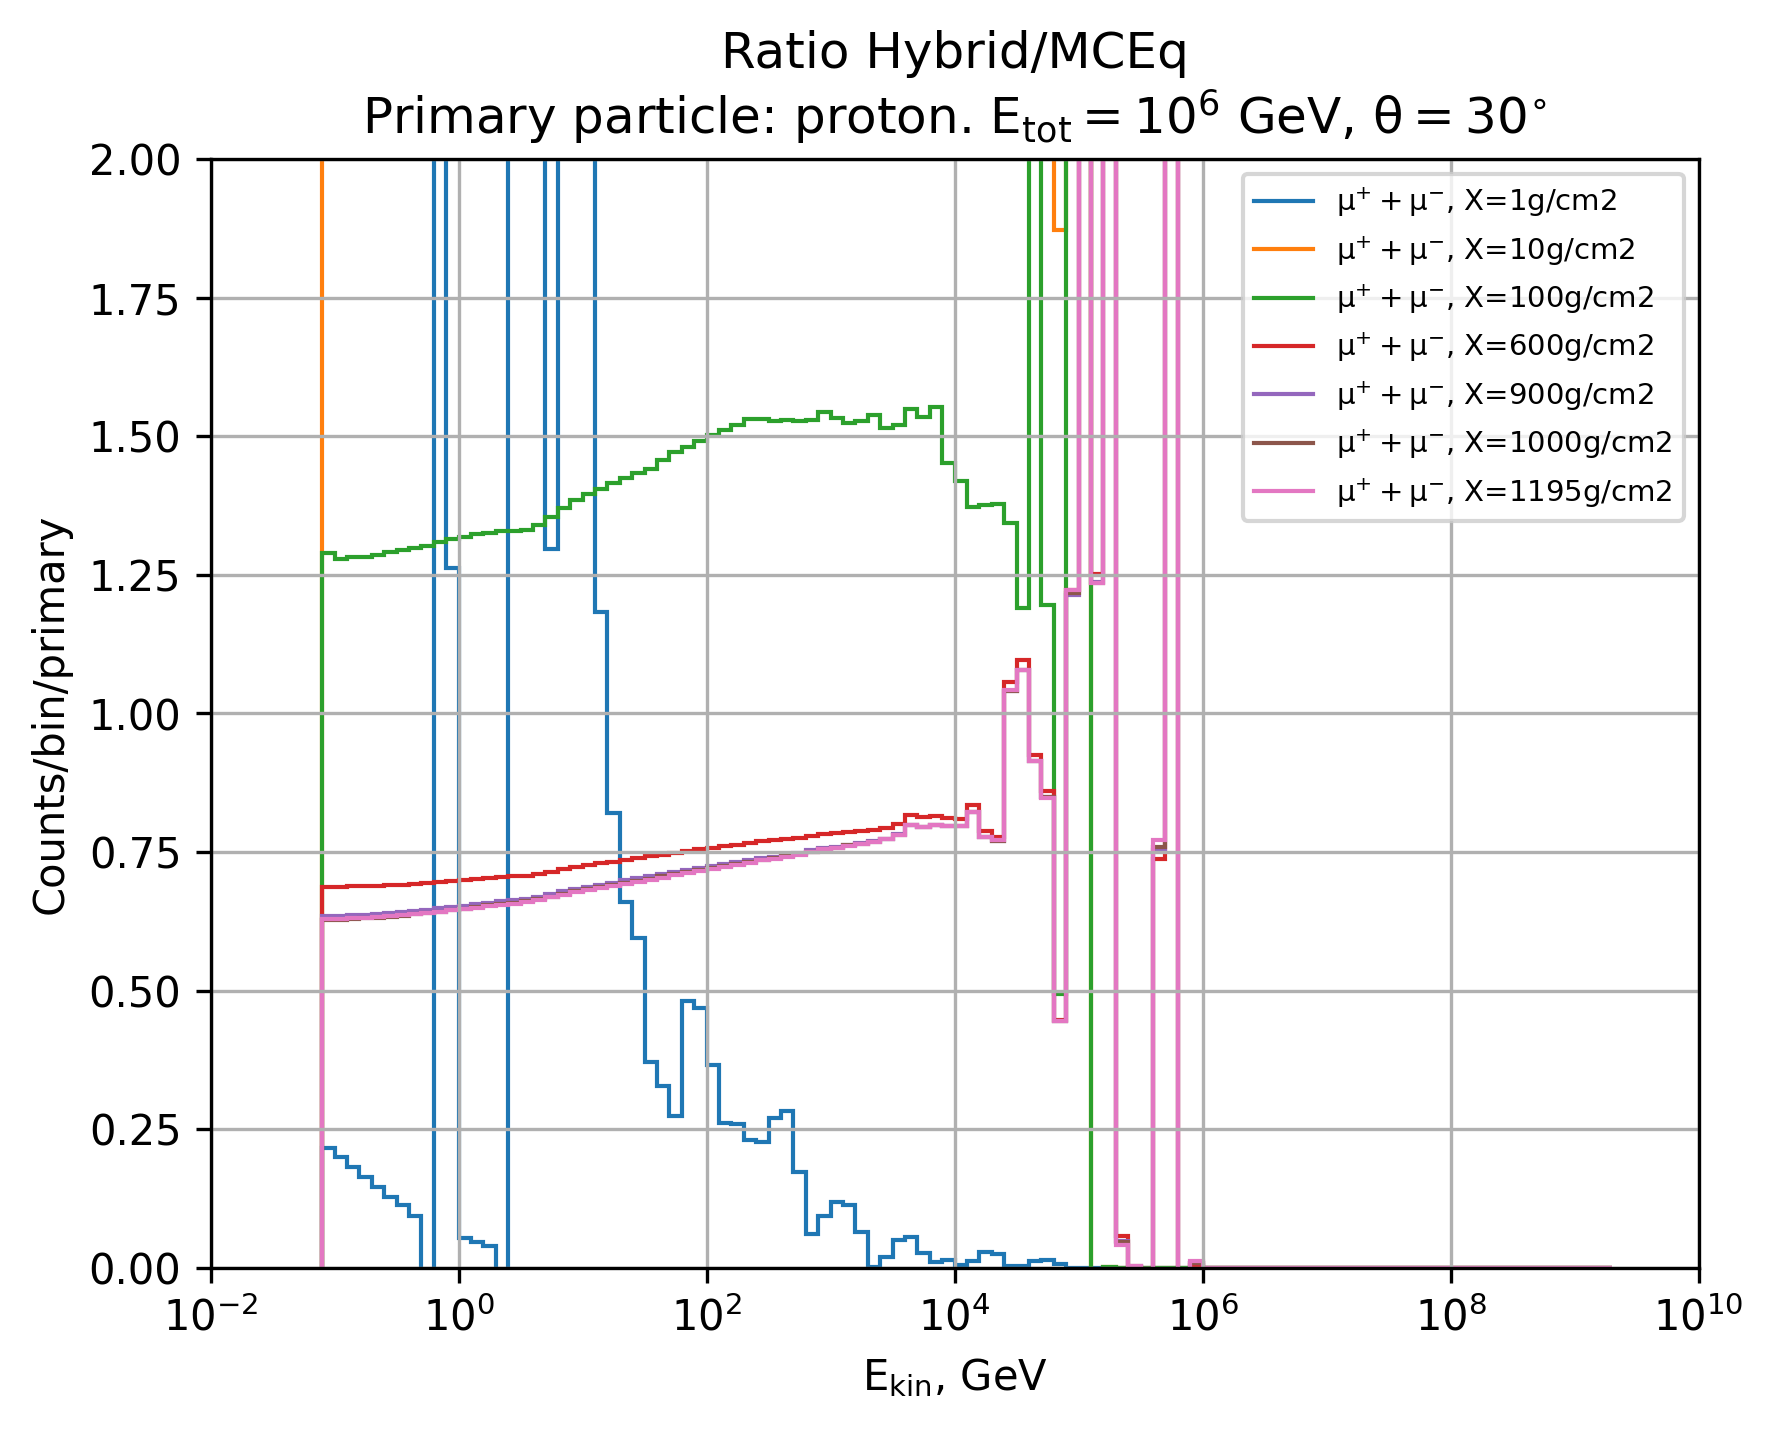

In [70]:
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ixdepth = 0
# plt.stairs(mceq_dist.flux[ixdepth]["pi0"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ Hybrid" + f"{mceq_dist.slant_depths[ixdepth]}", 
#            linestyle='-',
#            color = line_colors[0])
ixdepths = range(len(hybrid_mceq.slant_depths))
# ixdepths = [4, 5, 6]
for ixdepth in ixdepths:
    # plt.stairs(mceq_dist.flux[ixdepth]["mu"], mceq_dist.e_bins, 
    #         label = r"${\mu}^{+} + {\mu}^{-}$ MCEq" + f"{mceq_dist.slant_depths[ixdepth]}", 
    #         linestyle='--',
    #         color = line_colors[ixdepth])
    
    plt.stairs(hybrid_flux[ixdepth]["mu"]/regular_flux[ixdepth]["mu"], hybrid_mceq.e_bins, 
            label = r"${\mu}^{+} + {\mu}^{-}$, X=" + f"{hybrid_mceq.slant_depths[ixdepth]}g/cm2", 
            # linestyle='--',
            color = line_colors[ixdepth])

plt.xscale("log")
# plt.yscale("log")
plt.xlim(1e-2, 1e10)
plt.ylim(0, 2)
plt.legend(fontsize="7")
plt.grid()
plt.title("Ratio Hybrid/MCEq"+ "\nPrimary particle: proton. " 
          +  r"$E_{tot}=10^{6}$ GeV" + r", $\theta = 30^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Counts/bin/primary")

In [55]:
from cascade.cascade_analysis import CascadeAnalysis
cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 100
Initial state:
  $p$(2212) with energy = 1.000e+09

Final state:
  Number of all particles in cascade = 69818
  Number of final particles = 54719
  Number of interactions = 103
  Number of decays = 14996
  Max number of generations = 5

  Max xdepth = 1195.9290875457918
  Exectution time = 6.12 s
  Exectution time per run = 0.06 s
  Size of cascade_driver object = 15.43 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+09 GeV
  Energy in final particles = 1.00000e+09 GeV
  Relative gain(+)/loss(-) 9.952e-08
All final ids are unique, min = 1, max = 69817
